In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from tqdm.notebook import tqdm
from tqdm import trange
from sklearn.preprocessing import MinMaxScaler, StandardScaler

In [2]:
df = pd.read_csv("customer_dataframe.csv", sep="\t", index_col=0)
df.head()

,TProd,DProd,MaxPO,MinPO,MeanProdOrder,TSale,MinPSale,MaxPSale,MeanSaleOrder,TRProd,MeanPSale,TOrder,SETSaleQta,SESaleQtaOrder
CustomerID,,,,,,,,,,,,,,
17850,1702,21,141,12,48.629,5317.89,6.36,107.25,151.940,31,3.960,34,4.137,3.186
13047,1355,105,309,3,84.688,3089.10,6.64,68.00,193.069,35,3.926,9,5.421,3.875
12583,4978,114,714,100,292.824,6629.34,6.80,132.80,389.961,50,2.140,15,5.804,4.087
13748,439,24,208,8,87.800,948.25,9.36,204.00,189.650,0,3.996,5,4.080,2.322
15100,58,1,32,16,9.667,635.10,175.20,350.40,105.850,22,10.950,3,2.252,2.252


In [3]:
df_aux = df[['MeanProdOrder', 'MeanSaleOrder']]
df_aux.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 4333 entries, 17850 to 12713
Data columns (total 2 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   MeanProdOrder  4333 non-null   float64
 1   MeanSaleOrder  4333 non-null   float64
dtypes: float64(2)
memory usage: 101.6 KB


In [4]:
df_aux

,MeanProdOrder,MeanSaleOrder
CustomerID,,
17850,48.629,151.940
13047,84.688,193.069
12583,292.824,389.961
13748,87.800,189.650
15100,9.667,105.850
...,...,...
13436,76.000,196.890
15520,314.000,343.500
13298,96.000,360.000


In [5]:
df_aux.describe()

,MeanProdOrder,MeanSaleOrder
count,4333.000000,4333.000000
mean,201.104614,327.882896
std,274.590134,395.336014
min,0.000000,-0.000000
25%,80.500000,155.050000
50%,140.167000,241.900000
75%,237.750000,371.560000
max,7824.000000,9904.875000


In [6]:
scaler = MinMaxScaler()
X = scaler.fit_transform(df_aux.values)
X

array([[0.00621536, 0.01533992],
       [0.01082413, 0.01949232],
       [0.03742638, 0.03937061],
       ...,
       [0.01226994, 0.03634574],
       [0.01009714, 0.02295738],
       [0.06454499, 0.08021807]])

# GENETIC ALGORITHM

In [7]:
from pyclustering.cluster.ga import genetic_algorithm, ga_observer, ga_visualizer
from pyclustering.cluster import cluster_visualizer

In [8]:
# # Read data for clustering
# sample = X

# # Create instance of observer that will collect all information:
# observer_instance = ga_observer(True, True, True)

# # Create genetic algorithm where observer will collect information:
# ga_instance = genetic_algorithm(data=sample,
#                                 count_clusters=4,
#                                 chromosome_count=500,
#                                 population_count=100,
#                                 count_mutation_gens=3,
#                                 observer=observer_instance)

# # Start processing
# ga_instance.process()

# # Obtain results
# clusters = ga_instance.get_clusters()

# # Print cluster to console
# #print("Amount of clusters: '%d'. Clusters: '%s'" % (len(clusters), clusters))
# print([len(c) for c in clusters])

# # Show cluster using observer:
# ga_visualizer.show_clusters(sample, observer_instance)

In [9]:
# clusters_df = {}
# indexes = df.index
# for i in range(len(clusters)):
#     clusters_df[i] = df[df.index.isin([indexes[i] for i in clusters[i]])]

In [10]:
# attr = df_aux.columns
# clusters = [i for i in clusters_df]
# fig, axs = plt.subplots(len(attr),3,figsize=(15,15))
# for attr_index in range(len(attr)):
#     mean_values = []
#     max_values = []
#     min_values = []
#     for _, cluster_df in clusters_df.items():
#         mean_values.append(cluster_df.describe()[attr[attr_index]][1])
#         max_values.append(cluster_df.describe()[attr[attr_index]][7])
#         min_values.append(cluster_df.describe()[attr[attr_index]][3])
#     axs[attr_index][0].bar(clusters, mean_values)
#     axs[attr_index][0].set_title(f"{attr[attr_index]} - Mean")
#     axs[attr_index][1].bar(clusters, max_values)
#     axs[attr_index][1].set_title(f"{attr[attr_index]} - Max")
#     axs[attr_index][2].bar(clusters, min_values)
#     axs[attr_index][2].set_title(f"{attr[attr_index]} - Min")

In [11]:
def ga_cluster(sample, nc, cc, pc, mg):
    observer_instance = ga_observer(True, True, True)
    ga_instance = genetic_algorithm(data=sample, count_clusters=nc, chromosome_count=cc, population_count=pc,count_mutation_gens=mg,observer=observer_instance)
    ga_instance.process()
    clusters = ga_instance.get_clusters()
    print([len(c) for c in clusters])
    ga_visualizer.show_clusters(sample, observer_instance)
    clusters_df = {}
    indexes = df.index
    for i in range(len(clusters)):
        clusters_df[i] = df[df.index.isin([indexes[i] for i in clusters[i]])]
    attr = df_aux.columns
    clusters = [i for i in clusters_df]
    mean_values_to_plot= {a:[] for a in attr}
    for attr_index in range(len(attr)):
        mean_values = []
        for _, cluster_df in clusters_df.items():
            mean_values.append(cluster_df.describe()[attr[attr_index]][1])
        mean_values_to_plot[attr[attr_index]] = mean_values
    
    return mean_values_to_plot

[1462, 1418, 1453]


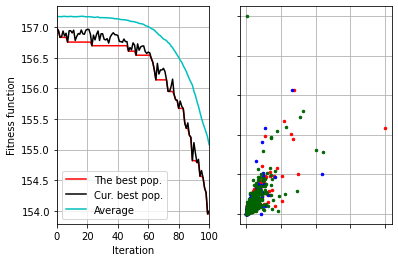

[1432, 1418, 1483]


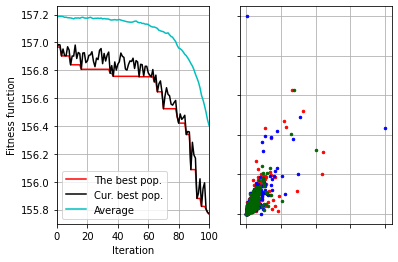

MemoryError: Unable to allocate 16.5 MiB for an array with shape (1000, 4333) and data type int32

In [12]:
nc_l = [3,4]
cc_l = [500, 1000]
pc = 100
mg_l = [3, 5]

means = []

for nc in tqdm(nc_l, total=len(nc_l)):
    for cc in tqdm(cc_l, total=len(cc_l)):
        for mg in tqdm(mg_l, total=len(mg_l)):
            means.append(ga_cluster(X, nc, cc, pc, mg))

In [13]:
means

[{'MeanProdOrder': [202.57379822161425, 159.30880324400562, 240.4153599449415],
  'MeanSaleOrder': [328.32981190150485,
   275.4555007052186,
   378.59773021335167]},
 {'MeanProdOrder': [211.2946843575419, 220.342529619182, 172.8702623061362],
  'MeanSaleOrder': [341.0192388268157, 362.71185049365306, 281.8959089683075]}]